# Pre-processing Bill's Text Data

## Import Python Packages

In [2]:
# For loading, manipulating dataframe.
import pandas as pd
import sqlite3

# For Text Preprocessing
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer

# For visualization
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

# ML Modeling packages
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection as ms
import sklearn.metrics
from sklearn.metrics import classification_report

# Hide Warning messages
import warnings
warnings.filterwarnings('ignore')

## Load Philippines' Bills Data

In [3]:
con = sqlite3.connect("phBills.db")
df = pd.read_sql_query("SELECT * from senateBills", con, index_col = 'bill_id', parse_dates = ['date_filed','date_lastUpdate'])
con.close()

## EDA

In [4]:
df['Passed']=np.where(df.ra!='',True, False)

In [5]:
df['long_title']=df['long_title'].str.lower()

In [6]:
df_13_17_all = df[df['congress']!=18]

In [7]:
df_num_rows, df_num_col = df.shape
print(f"There are {df_num_rows} records and {df_num_col} features on our original data frame.")
bill_passage_rate = (df_13_17_all['ra']!='').sum()/((df_13_17_all['ra']!='').sum() + (df_13_17_all['ra']=='').sum())
print(f"From 13th Congress to 17th Congress, the PH Bill Passage Rate is {(bill_passage_rate*100):.2f}%")

There are 16284 records and 15 features on our original data frame.
From 13th Congress to 17th Congress, the PH Bill Passage Rate is 2.89%


## Text Preprocessing

### Tokenizer

In [8]:
df_13_17_all['long_title'] = df_13_17_all['long_title'].map(word_tokenize)

### Lemmatizer

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
df_13_17_all['long_title_lem'] = df_13_17_all['long_title'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_13_17_all['long_title_lem'] = df_13_17_all['long_title_lem'].apply(lambda x: ' '.join(x))

### Divide Proposed Laws (Pass or Not)

In [11]:
df_13_17_passed = df_13_17_all[df_13_17_all['Passed']==True]
df_13_17_failed = df_13_17_all[df_13_17_all['Passed']==False]

## Bag of Words – TFID Vectorizer

### Creating Vectorizer Instances

#### All Bills Vectorizer

In [12]:
vectorizer_13_17_all = TfidfVectorizer(min_df=10, max_df=0.90)
vectorizer_13_17_all.fit(df_13_17_all['long_title_lem'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

#### Passed Bill Vectorizer

In [13]:
vectorizer_13_17_passed = TfidfVectorizer(min_df=10, max_df=0.90)
vectorizer_13_17_passed.fit(df_13_17_passed['long_title_lem'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

#### Pending Bill Vectorizer

In [14]:
vectorizer_13_17_failed = TfidfVectorizer(min_df=10, max_df=0.90)
vectorizer_13_17_failed.fit(df_13_17_failed['long_title_lem'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=10, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

## Word Clouds

### Proposed Laws Word Cloud

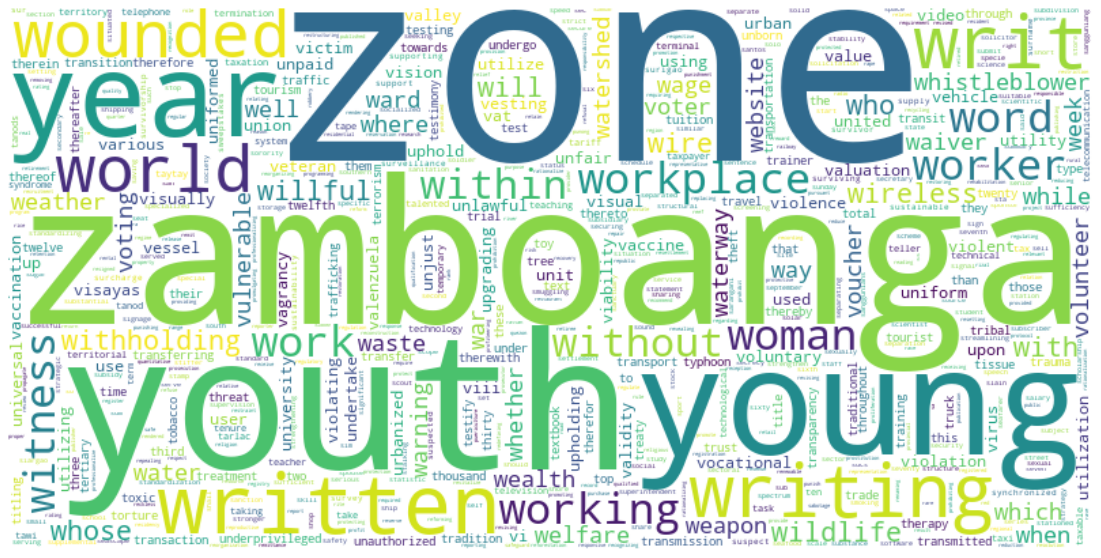

In [15]:
wc = WordCloud(width=800, height=400, max_words = 1000,stopwords=stopwords, background_color='white')
wc.generate_from_frequencies(frequencies=vectorizer_13_17_all.vocabulary_)
plt.style.use('seaborn-dark')
plt.figure( figsize=(20,10) )
plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [37]:
vectorizer_13_17_all.vocabulary_

{'establishing': 938,
 'the': 2254,
 'fiscal': 1026,
 'regime': 1914,
 'for': 1038,
 'mining': 1492,
 'industry': 1236,
 'authorizing': 416,
 'sale': 2018,
 'of': 1592,
 'certain': 554,
 'parcel': 1656,
 'land': 1341,
 'in': 1211,
 'barangay': 437,
 'quezon': 1870,
 'city': 579,
 'by': 511,
 'university': 2338,
 'philippine': 1711,
 'to': 2282,
 'government': 1103,
 'amending': 347,
 'purpose': 1863,
 'republic': 1955,
 'no': 1565,
 'otherwise': 1629,
 'known': 1332,
 'charter': 567,
 '2008': 88,
 'and': 355,
 'other': 1628,
 'increasing': 1224,
 'excise': 956,
 'tax': 2221,
 'on': 1607,
 'tobacco': 2283,
 'product': 1809,
 'penalty': 1683,
 'violation': 2377,
 'provision': 1851,
 'article': 386,
 'subject': 2171,
 'earmarking': 854,
 'human': 1174,
 'resource': 1970,
 'development': 795,
 'program': 1820,
 'health': 1138,
 'professional': 1814,
 'this': 2271,
 'section': 2051,
 '164': 51,
 '263': 113,
 '288': 125,
 'national': 1535,
 'internal': 1283,
 'revenue': 1992,
 'code': 599,
 

### Passed Laws Word Cloud

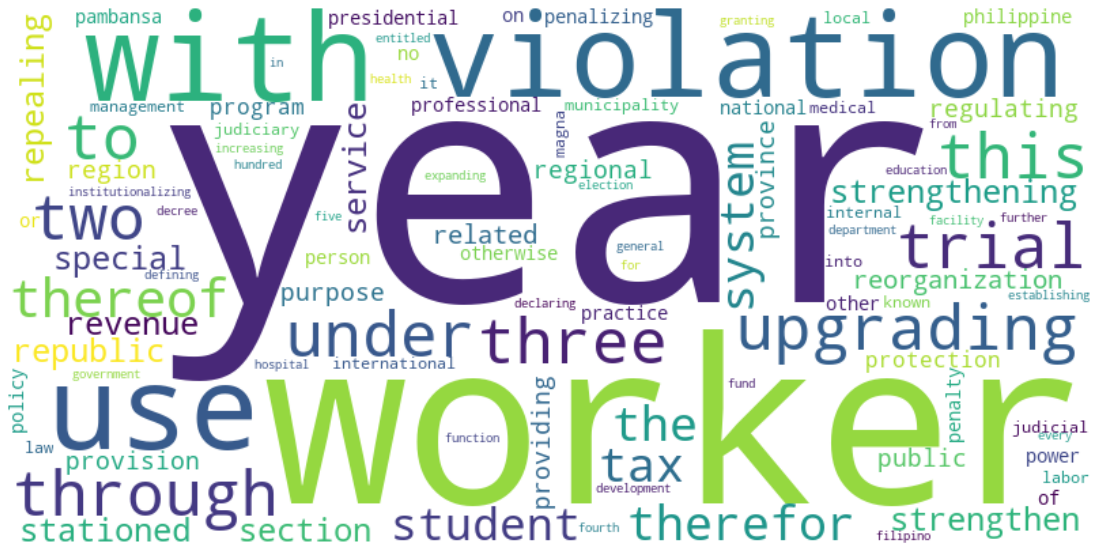

In [16]:
wc = WordCloud(width=800, height=400, max_words = 100,stopwords=stopwords, background_color='white')
wc.generate_from_frequencies(frequencies=vectorizer_13_17_passed.vocabulary_)
plt.figure( figsize=(20,10) )
plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

### Pending Bills Word Cloud

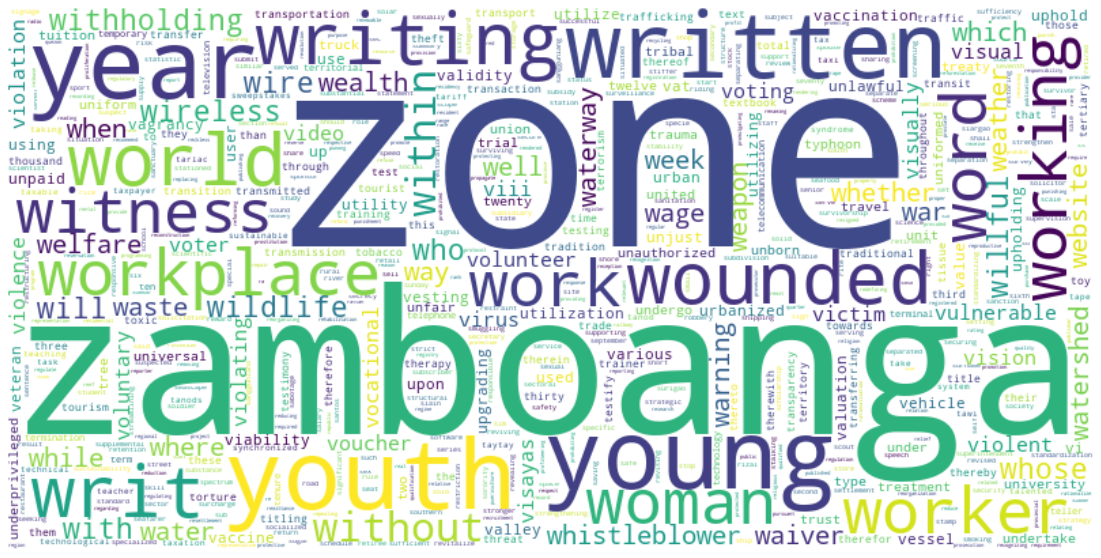

In [17]:
wc = WordCloud(width=800, height=400, max_words = 1000,stopwords=stopwords, background_color='white')
wc.generate_from_frequencies(frequencies=vectorizer_13_17_failed.vocabulary_)
plt.figure( figsize=(20,10) )
plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

## Machine Learning Modeling

### Preparing our Data Sets

#### Vectorizing Text Feature

In [18]:
# x = vectorizer_13_17_all.fit_transform(df_13_17_all['long_title_lem'].values.astype('U'))
x = vectorizer_13_17_all.fit_transform(df_13_17_all['long_title_lem'])

#### Sampling Technique

In [19]:
# Under sample the majority target variable, so that we get about equal number of observations from both classes.
rus = RandomUnderSampler(random_state=42)
nx, ny = rus.fit_resample(x, df_13_17_all['Passed'])
print(f"Our new data set has {ny.shape[0]} data points.")

Our new data set has 876 data points.


#### Splitting Data Into Train & Test Sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(nx, ny, test_size = 0.33, random_state=43)
print(f"Our train set has {X_train.shape[0]} data points whilst our test set has {X_test.shape[0]} data points.")

Our train set has 586 data points whilst our test set has 290 data points.


#### Truncated SVD to Reduce Dimension

In [21]:
svd = TruncatedSVD(n_components=400, algorithm='arpack', random_state = 42)
new_x = svd.fit_transform(X_train)

### Using SVC

In [22]:
svc = SVC(gamma='auto', kernel='linear', random_state = 42)

#### Fit Model Using Train Set

In [23]:
svc.fit(new_x, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

#### Predictions Using New Model

##### On Train Set

In [24]:
predicted_train = svc.predict(new_x)

##### On Test Set

In [25]:
predicted = svc.predict(svd.transform(X_test))

#### Model Evaluation

##### On Train Set

In [26]:
print(classification_report(y_train, predicted_train))

              precision    recall  f1-score   support

       False       0.87      0.90      0.89       304
        True       0.89      0.85      0.87       282

    accuracy                           0.88       586
   macro avg       0.88      0.88      0.88       586
weighted avg       0.88      0.88      0.88       586



##### On Test Set

In [27]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.59      0.71      0.65       134
        True       0.70      0.58      0.64       156

    accuracy                           0.64       290
   macro avg       0.65      0.65      0.64       290
weighted avg       0.65      0.64      0.64       290



### Using Decision Tree Classifier

In [28]:
tree_model = DecisionTreeClassifier(random_state=42)

#### Fit Model Using Train Set

In [29]:
tree_model.fit(new_x, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

#### Predictions Using New Model

In [30]:
predicted = tree_model.predict(svd.transform(X_test))

#### Model Evaluation

In [31]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.54      0.57      0.56       134
        True       0.61      0.58      0.60       156

    accuracy                           0.58       290
   macro avg       0.58      0.58      0.58       290
weighted avg       0.58      0.58      0.58       290



### Using Random Forrest Classifier

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

#### Fit Model Using Train Set

In [33]:
rf_model.fit(new_x, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Predictions Using New Model

In [34]:
predicted = rf_model.predict(svd.transform(X_test))

#### Model Evaluation

In [35]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

       False       0.61      0.52      0.56       134
        True       0.63      0.71      0.67       156

    accuracy                           0.62       290
   macro avg       0.62      0.62      0.62       290
weighted avg       0.62      0.62      0.62       290



In [36]:
ten_fold_cv = ms.StratifiedKFold(n_splits=10, shuffle=True)
for n_trees in [2, 5, 10, 20, 50, 100,150,200,300]:
    aucs = ms.cross_val_score(RandomForestClassifier(n_estimators=n_trees), new_x, y_train, scoring='roc_auc', cv=ten_fold_cv)
    print(f"{n_trees} trees: mean AUC {np.mean(aucs):.2%}%")

2 trees: mean AUC 53.64%%
5 trees: mean AUC 55.57%%
10 trees: mean AUC 62.55%%
20 trees: mean AUC 62.50%%
50 trees: mean AUC 66.38%%
100 trees: mean AUC 66.46%%
150 trees: mean AUC 67.58%%
200 trees: mean AUC 65.95%%
300 trees: mean AUC 66.63%%
